# In short

* Compare **Predict temporal**:
    * Random forest 
    * Extra trees 
    * Ada boost 
    * Bagging 
    * Gradient boosting
* **Predict spatial**: LSTM

# Data sources

* **Water level**:
    * In channel (**within** the drainge network)
    * 4 GPs  
👉 Use for **temporal water** level predictions

* **Surface water depth**:
    * **overflows** from drainge channels
    * Also include: spatial extent of **flood inundation** all **60 blocks**  
👉 Use for **spatial floodwater** level predictions

* **Rainfall event**:
    * **Define**: 1 sự kiện mưa = lượng mưa trong giờ > 30mm
    * constructed rainfall events are **represented** by: **minimum, maximum, mean, sum**

* **Others**: (Nhưng không nói kỹ)
    * topographic elevation-based flood-prone areas
    * land-use patterns 

# Data processing

* **Hydrological Model**: SWMM-based
    * Dùng để mô phỏng dữ liệu water level

* **Number of lag features**: determination by using **PACF, ACF**:
    * **rainfall**: 7h
    * **simualated water level**: 7h
    * **surface data**: 6h

$$ y(wl_t) = f(r_t, r_{(t-1, ..., t-7)}, wl_{(t-1,...,t-7)}) $$

trong đó:
* R: rainfall
* wl: water level
* t: timestep

* **Standardized**: 
    * mean: 0
    * std: [-1,1]
$$ z = \frac{x-u}{s} $$

# Split

* **Temporal** water level predictions:
    * train: 90%
    * test: 10%
* **Spatial** water level predictions:
    * train: 75%
    * validation: 15%
    * test: 15%

# Models

*Almost using* **ensemble learning**

## RF

* **Bagging** 
* **Bootstrapping** method for **multiple decision tree**

## Gradient boosting

* **Boosting**
* at every iteration, new **decision tree** is fitted to the **residuals** of current model
* focus on **correcting errors made by previous models**

## Bagging

* **Bagging**
* Gần tương tự như **RF**, khác:
    * các  **weak learners** có thể là các model khác **DT**
    * Mỗi **weak learners** có thể sử dụng tất cả **fts**

## Adaboost

* **Boosting**
* 1st weak learner (Stump: cây đơn giản 1 hoặc 2 tầng) được train và predict
* **Cập nhật trọng số cho MẪU**: mẫu có trọng số sau đó được train, predict với **weak learner** mới.
* **Output** là tổ hợp tuyến tính có trọng số (Model lỗi nhiều thì trọng số cao) của các **weak learners**

## Extra Trees

* **Bagging**
* Chọn ngẫu nhiên **subset fts** với **random split point** at each node cho mỗi **DT**
* Dùng toàn bộ data thay vì **Boostrap**

## LSTM

# Evaluate

Denote:
* $ Q_{sim_i}$: observed value at each timestep
* $ Q_{pred_i}$: simulated value at each timestep

## R2
$$ R^2 = 1 - \frac{\sum_{i=1}^n ({Q_{sim_i}} - \overline{Q_{sim_i}})^2}{\sum_{i=1}^n(Q_{sim_i} - Q_{pred_i})^2} $$

> Đo tương quan giữa 2 phân phối

*(bị ngược phân số???)*

## Kling-Gupta Efficiency (KGE)
$$ KGE = \sqrt{ (1-r)^2 + (\alpha - 1)^2 + (\beta - 1)^2 } $$

trong đó:
* $r$ là $R^2$
* $\alpha$ là tỷ lệ **std** dự đoán / thực tế
* $\beta$ là tỷ lệ **std** dự đoán / thực tế (???)

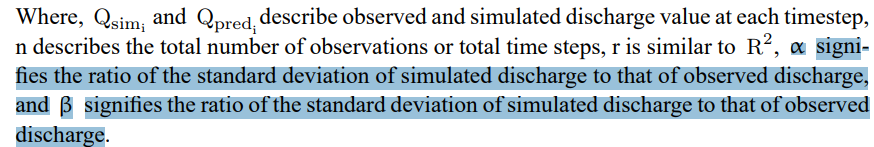

> Chắc $\beta$ là **mean**

## RMSE

$$ RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^n (Q_{sim_i} - Q_{pred_i})^2} $$

> Căn tổng bình phương sai số

## NSE

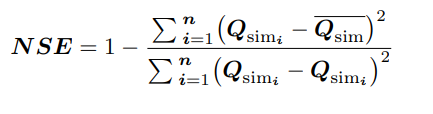

*(???)*

$$ NSE = 1 - \frac{\sum_{i=1}^n (Q_{sim_i} - Q_{pred_i})^2}{\sum_{i=1}^n (Q_{sim_i} - \overline{Q_{sim}})^2} $$

> Tương tự $R^2$

# Environment

## Hardware

* RAM: 16gb
* CPU: 2.9Ghz
* GPU: GTX 1650 8Gb

## Config

* LSTM:
    * Dropout rate: **0.3**
    * activation function: **LeakyReLU**
    * **150** epochs

# Results

## Temporal

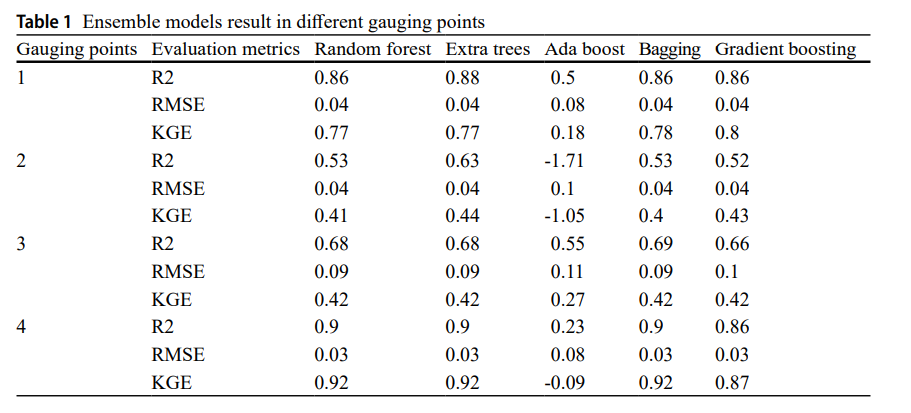

## Spatial

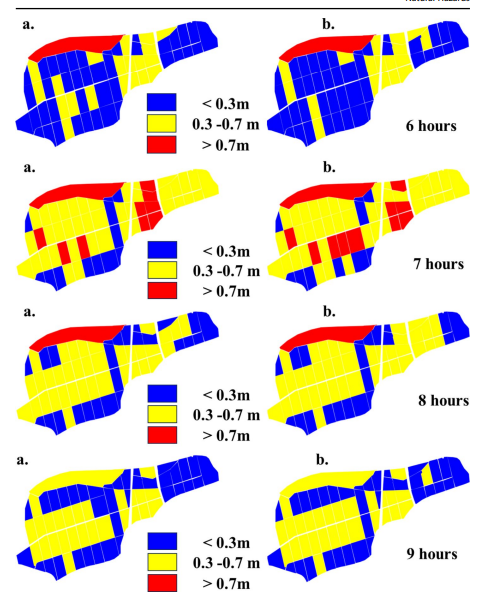